In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
house=pd.read_csv("Bengaluru_House_Data.csv")
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
house.shape

(13320, 9)

In [4]:
#Data Cleaning:

house.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
house.drop(columns=['balcony','society','availability'],axis=1,inplace=True)

In [6]:
#Inference:Its not possible to determine price w.r.t availability. so we can drop this feature.

In [7]:
house.dropna(inplace=True,axis=0)

In [8]:
house['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
#convert size to numerical:

house['size']=house['size'].str.split(" ").str[0]

house.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,51.00


In [10]:
house['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [11]:
house['total_sqft'].value_counts()

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: total_sqft, Length: 2067, dtype: int64

In [12]:
#Inference: we could see some of the values in total-sqft are in range . so to extract those
house['total_sqft'].astype('object')

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [13]:
df = house.copy()
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,120.00


In [14]:
df.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                             4
total_sqft                  2475.0
bath                           4.0
price                        186.0
Name: 30, dtype: object

In [15]:
# Comparing bhk(size) and bathroom :
df['size']=df['size'].astype('int')
df['bath']=df['bath'].astype('int')
df_1=df.copy()

df_1=df.loc[df['bath']>df['size']+2]

In [16]:
df_1

#Its unusual to have bathrooms greater than BHK, which is incorrect data, we can drop these columns

,area_type,location,size,total_sqft,bath,price
1078,Plot Area,BTM 1st Stage,9,3300.0,14,500.0
1953,Plot Area,KR Puram,8,1200.0,12,110.0
1979,Plot Area,Hongasandra,8,990.0,12,120.0
2620,Super built-up Area,Sathya Sai Layout,6,11338.0,9,1000.0
6838,Super built-up Area,Rajaji Nagar,5,7500.0,8,1700.0
6937,Plot Area,5th Block Hbr Layout,9,2600.0,12,675.0
7709,Built-up Area,Chikkabanavar,4,2460.0,7,80.0
8106,Plot Area,Wilson Garden,8,1850.0,12,300.0
9974,Plot Area,Sector 1 HSR Layout,3,2400.0,6,775.0
9990,Plot Area,Doddakannelli,6,1200.0,9,122.0


<AxesSubplot:xlabel='bath', ylabel='size'>

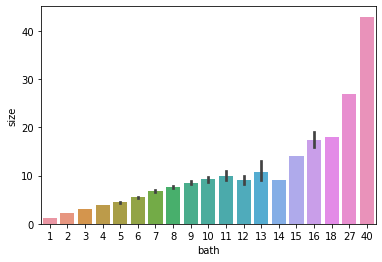

In [17]:
#Visualize bathroom w.r.t size

sns.barplot(x=df['bath'],y=df['size'])

In [18]:
df.drop(index=[2620,12103],axis=0,inplace=True)

In [19]:
#Finding the unique values for location:

location_stats=df['location'].value_counts()

#We could see some of the locations are one time occuring , we can keep a threshold where if location count is less than 10 , we can replace it as others

In [20]:
df['location'].nunique()

1298

In [21]:
df['location']=df['location'].apply(lambda x:"Others" if location_stats[x] <=10 else x)

In [22]:
df['location'].value_counts()

Others                       2886
Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: location, Length: 241, dtype: int64

In [23]:
df['location'].nunique()

241

In [24]:
df.head(2)

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5,120.00


In [25]:
df.shape

(13198, 6)

In [26]:
df['price'].describe(percentiles=[0,0.25,0.50,0.75,0.85,0.95,1])

count    13198.000000
mean       112.208634
std        148.987012
min          8.000000
0%           8.000000
25%         50.000000
50%         71.805000
75%        120.000000
85%        165.000000
95%        320.000000
100%      3600.000000
max       3600.000000
Name: price, dtype: float64

C:\Users\a0g0btd\Anaconda3\envs\bglrhousepred\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


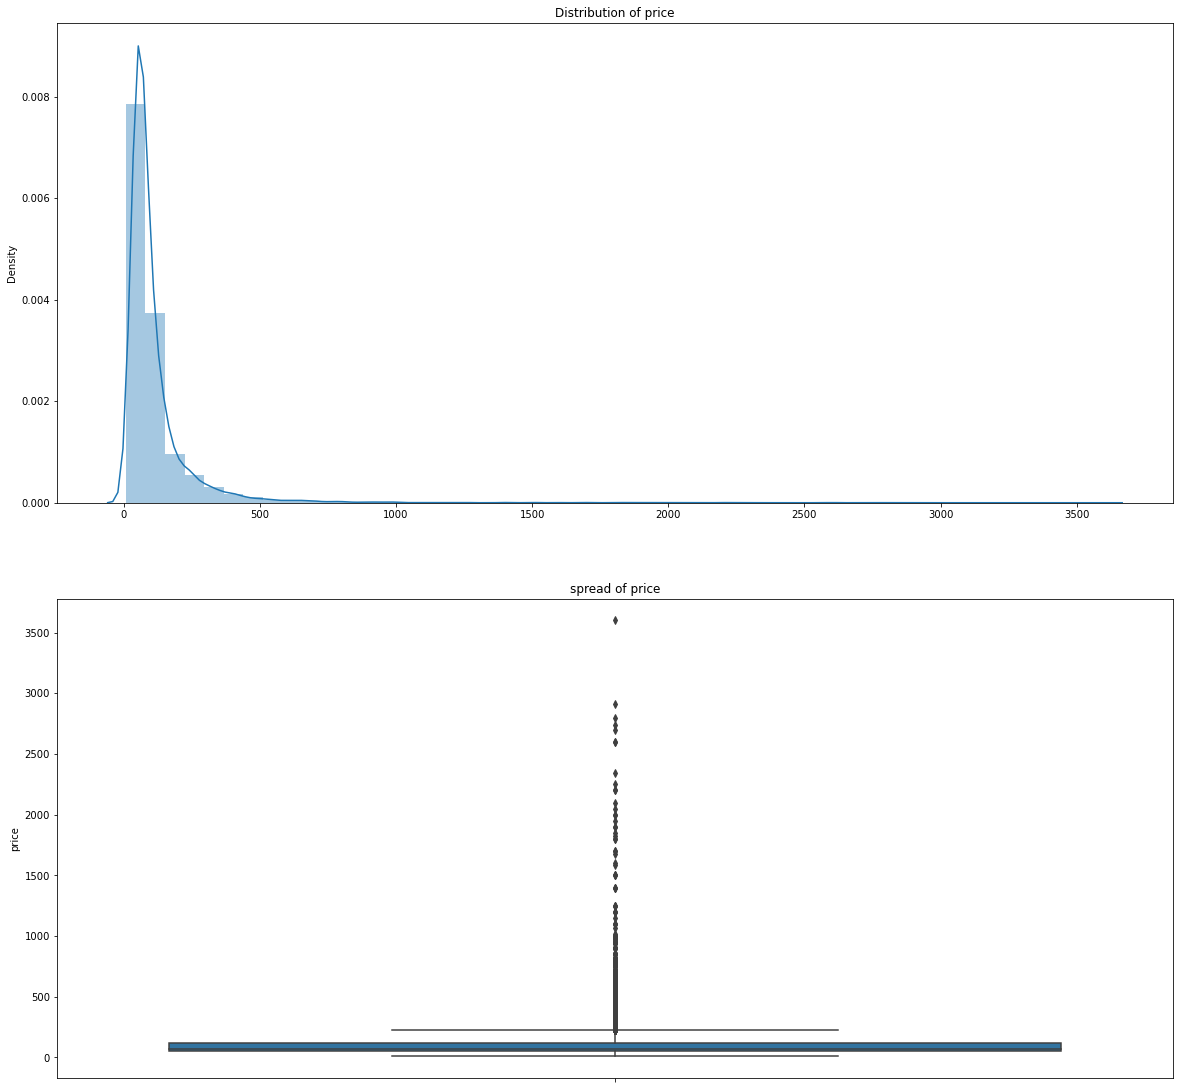

In [27]:
#Data Visualization

plt.figure(figsize=(20,30))

plt.subplot(3,1,1)
sns.distplot(x=df['price'])
plt.title("Distribution of price")

plt.subplot(3,1,2)
sns.boxplot(y=df['price'])
plt.title("spread of price")

plt.show()

In [28]:
#Compare BHK apartments with Price:

def visualize(X,Y):
    plt.figure(figsize=(20,30))

    plt.subplot(3,1,1)
    sns.countplot(x=df[X])
    plt.title("Count of {}".format(X))

    plt.subplot(3,1,2)
    sns.boxplot(x=df[X],y=df[Y])
    plt.title("comparison of {} w.r.t {}".format(X,Y))


    dft=pd.DataFrame(df.groupby([X])[Y].mean())
    dft.plot(kind='barh',figsize=(15, 10))
    plt.title("comparison of {} w.r.t {}".format(X,Y))


    plt.show()

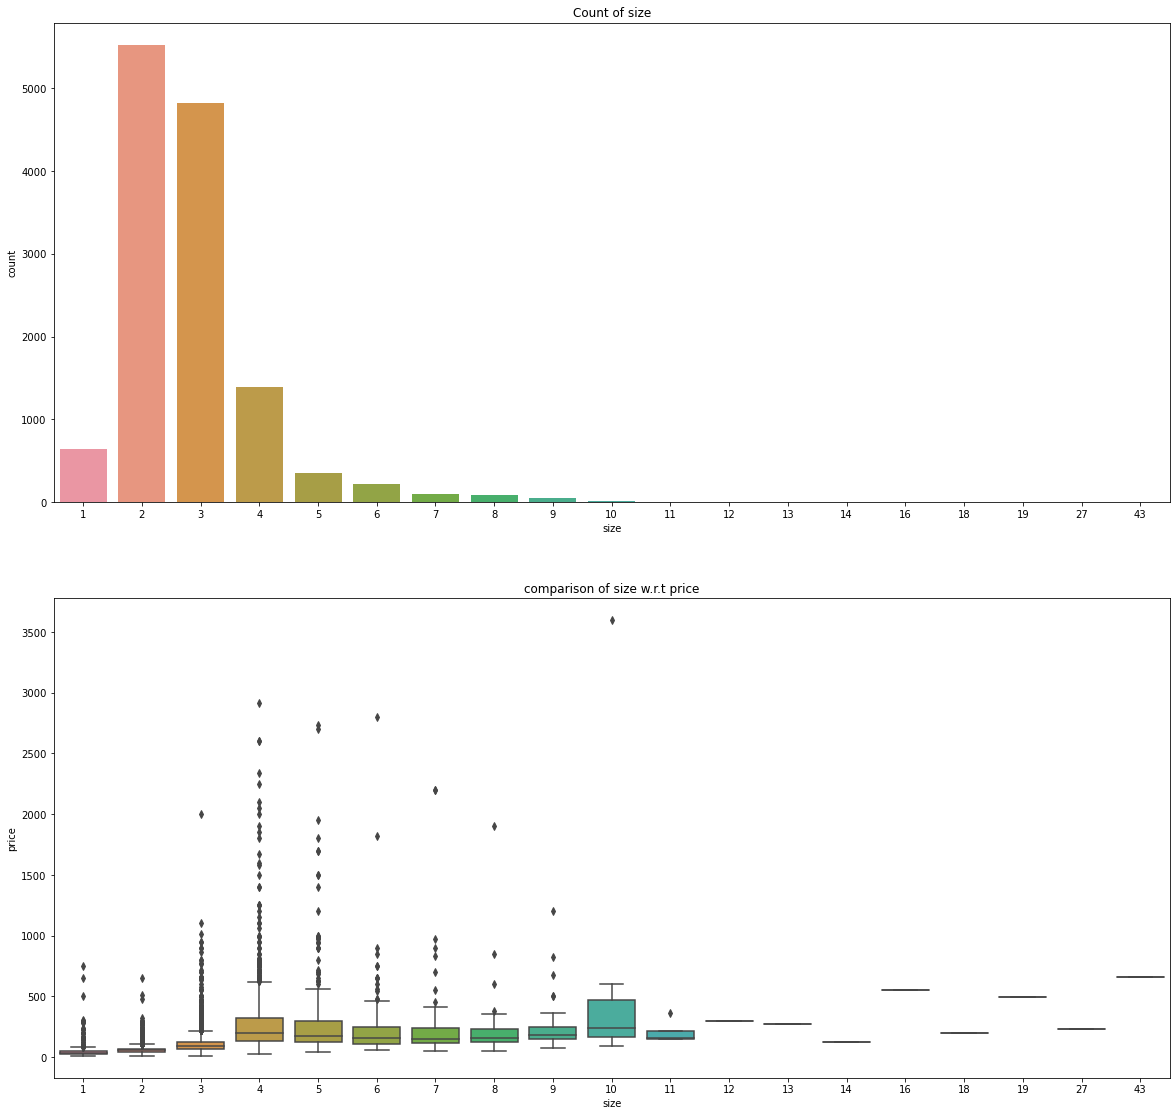

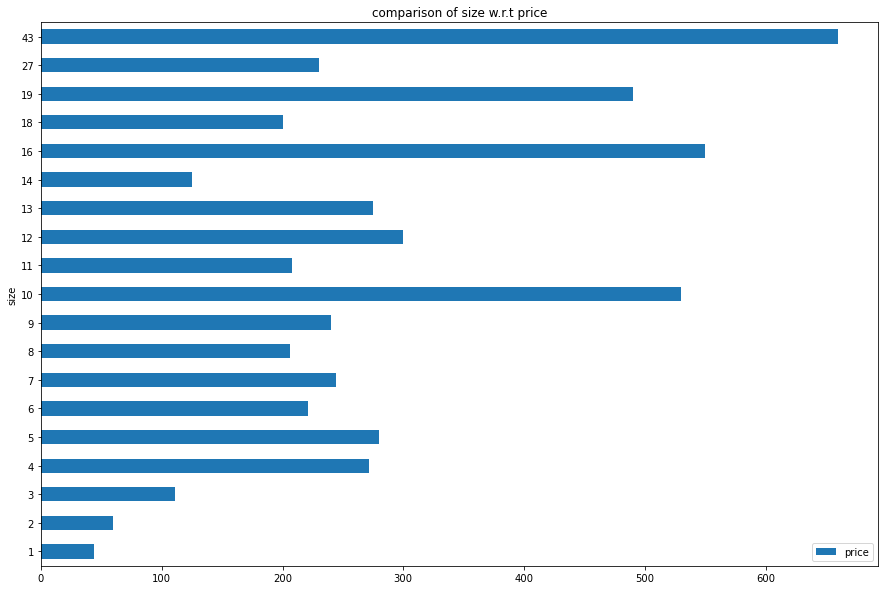

In [29]:
visualize('size','price')

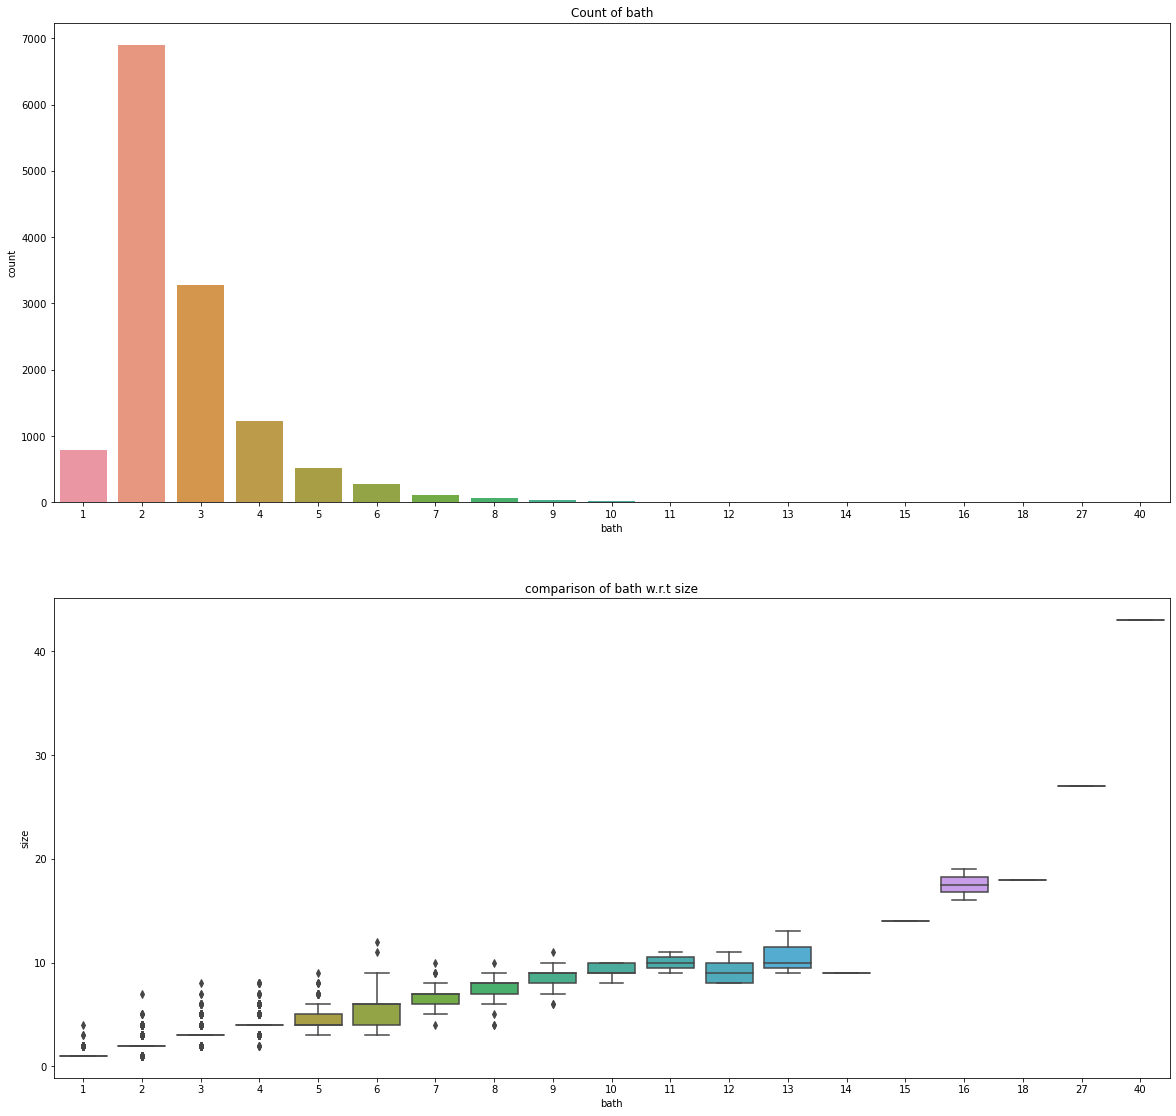

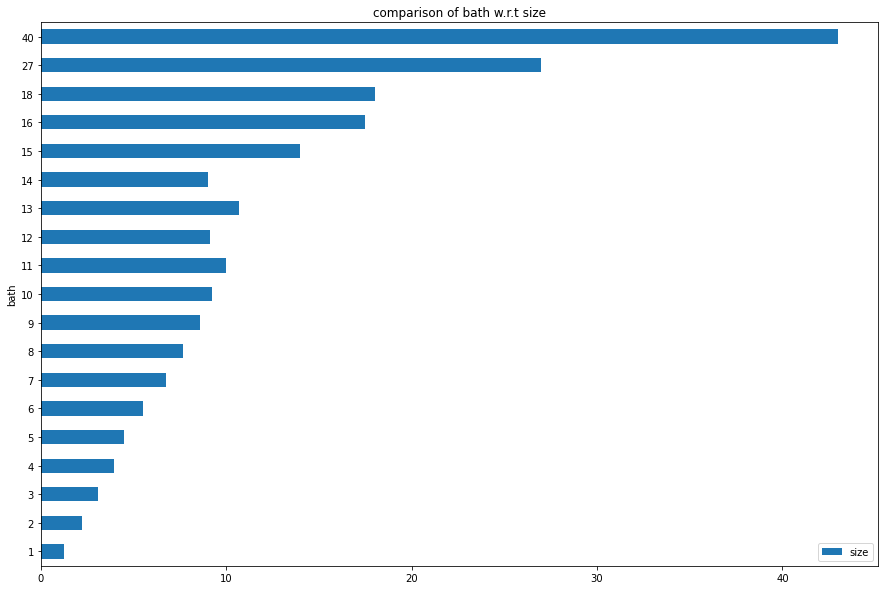

In [30]:
visualize('bath','size')

Text(0.5, 1.0, 'scatterness of sqft w.r.t price')

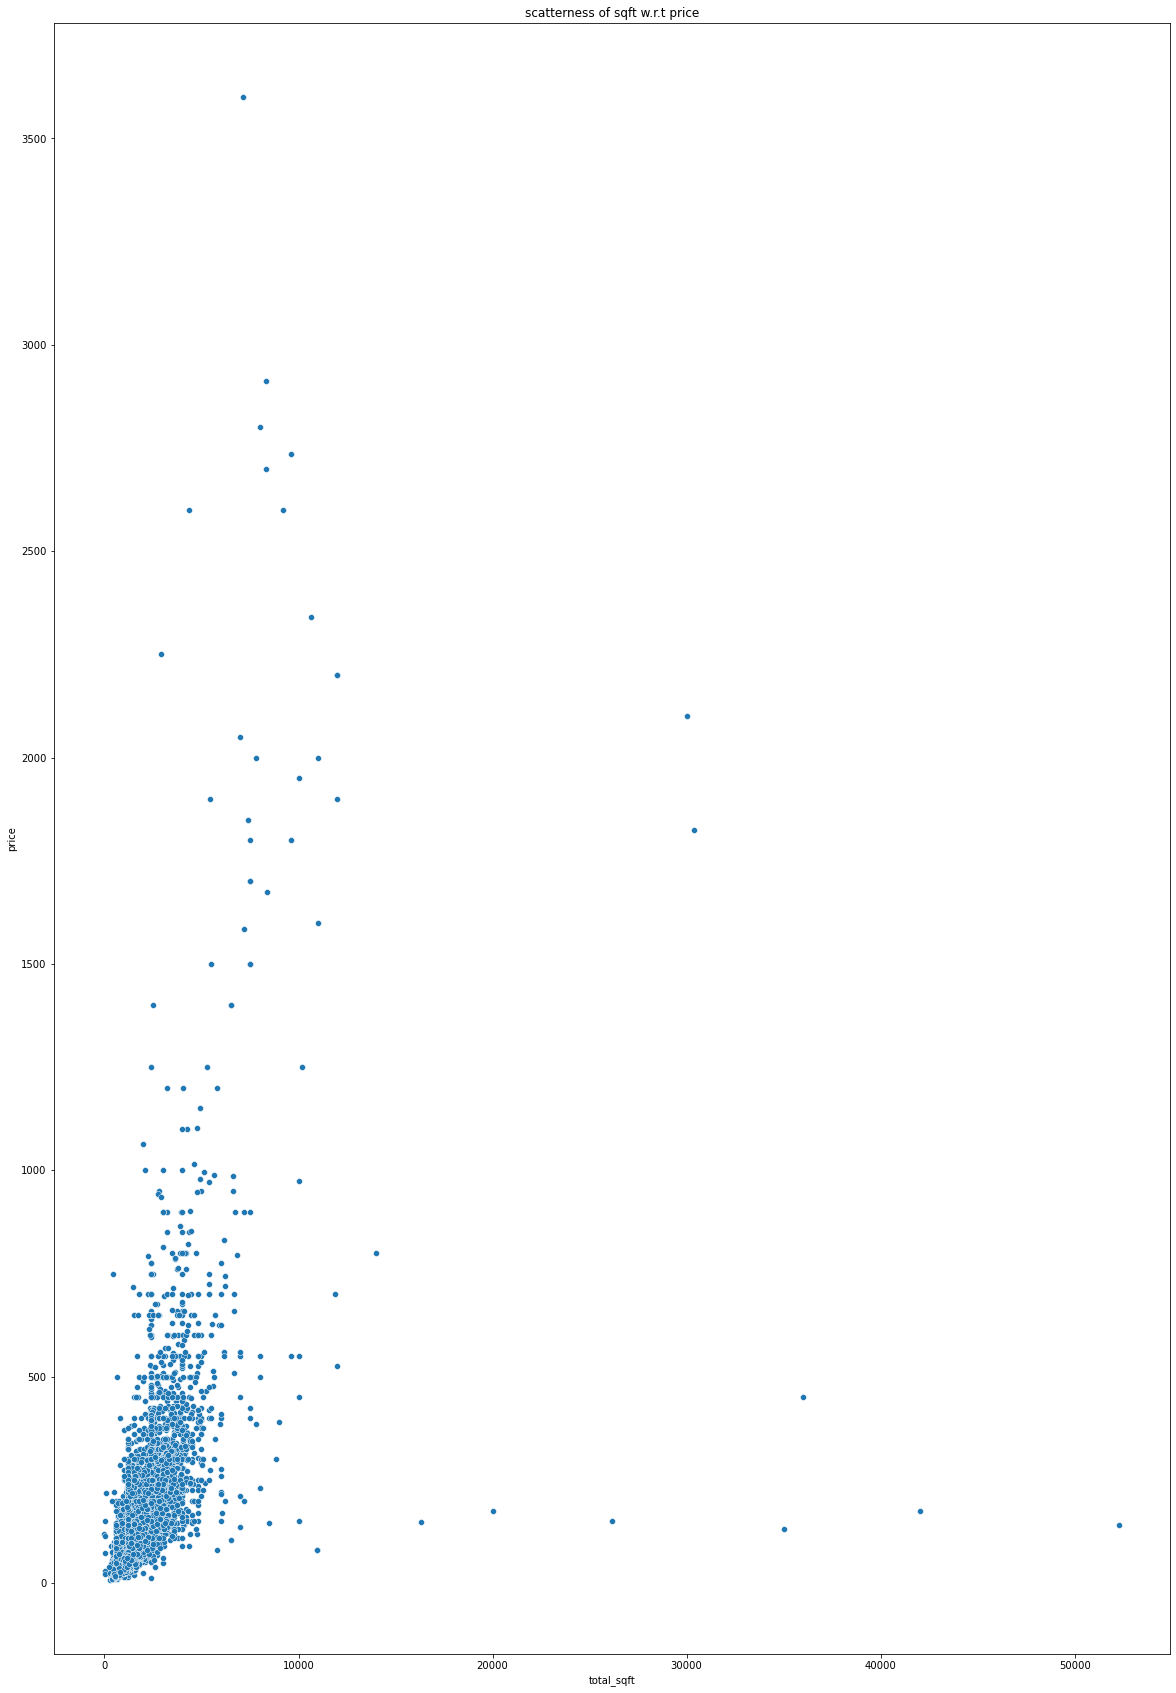

In [31]:
plt.figure(figsize=(20,30))

sns.scatterplot(x=df['total_sqft'],y=df['price'])
plt.title("scatterness of sqft w.r.t price")

In [32]:
#Inference: total_sqft is exponentially linear to price , but we could observe some outliers for 20,000,30,000,50,000 sqft the price is very low

Text(0.5, 1.0, 'scatterness of sqft w.r.t price')

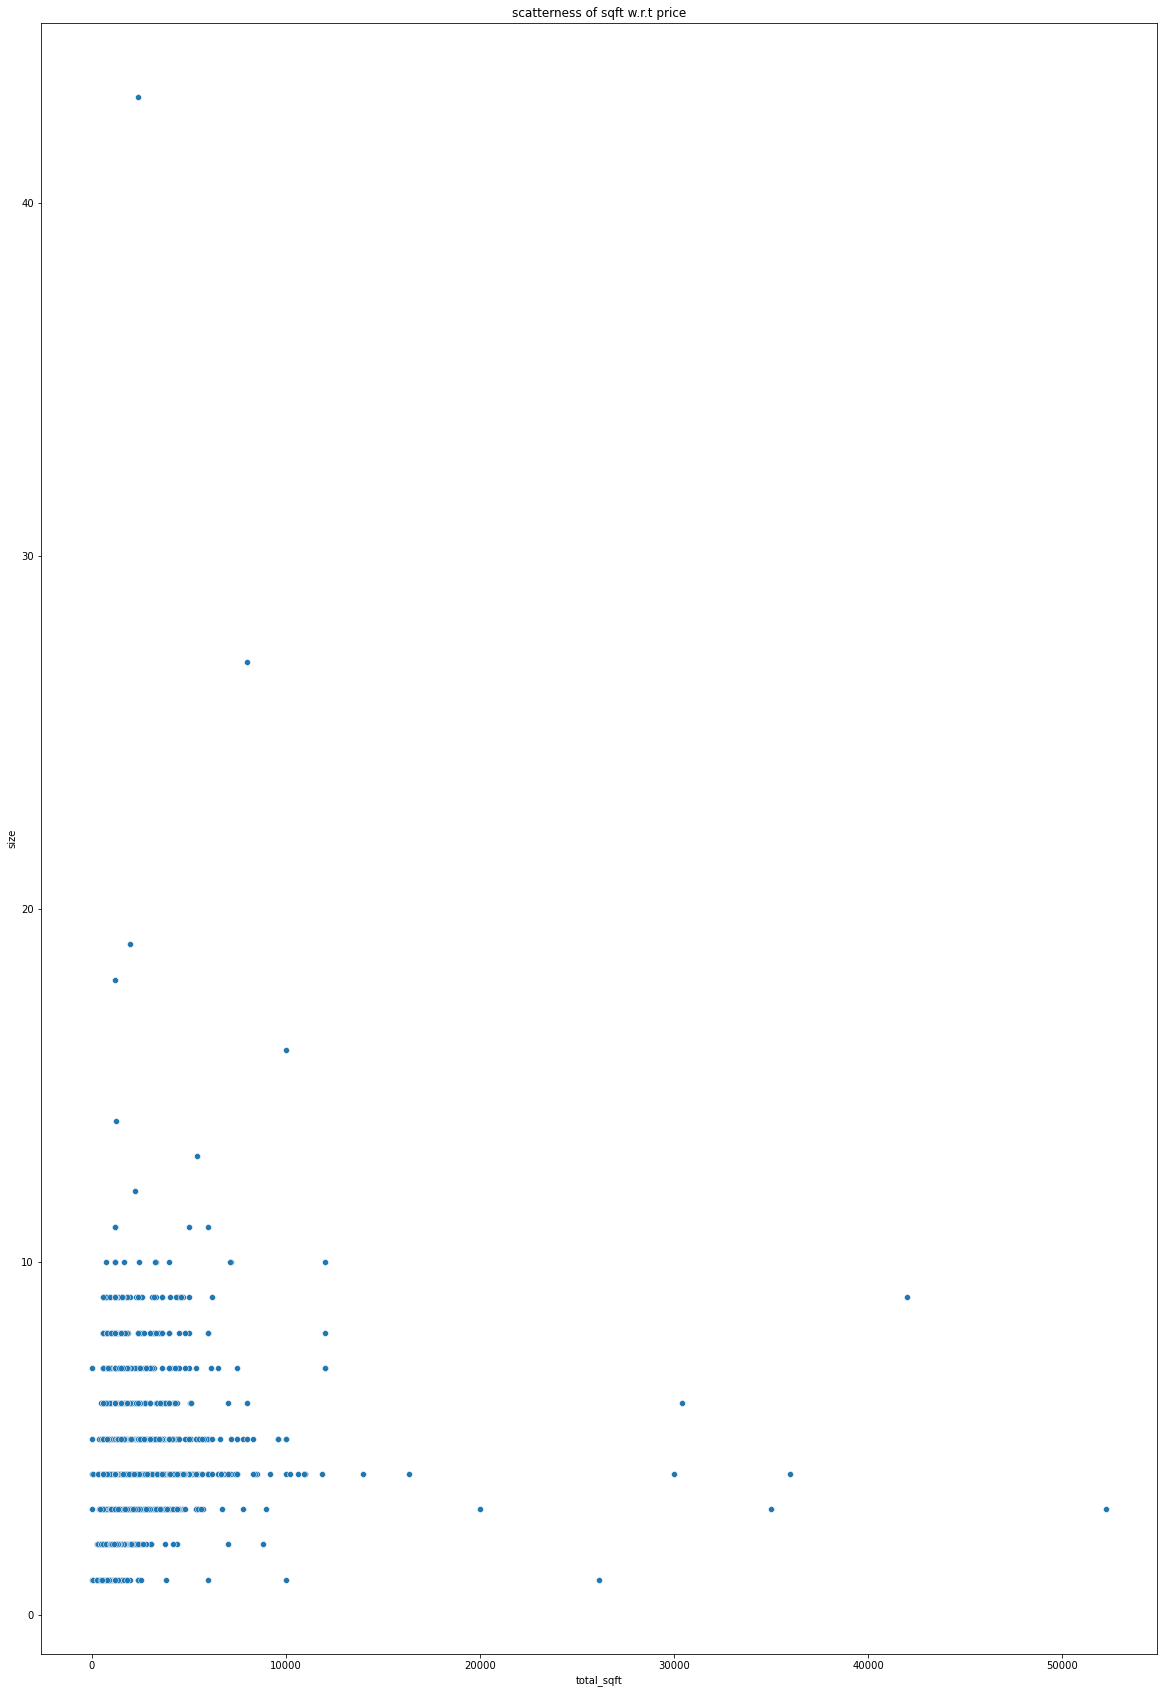

In [33]:
plt.figure(figsize=(20,30))

sns.scatterplot(x=df['total_sqft'],y=df['size'])
plt.title("scatterness of sqft w.r.t price")

In [34]:
#Inference : 1 to 10 bhk apartments have sqft greater than 50,000 which is an outlier.

In [35]:
df['price_per_sqft']=round((df['price']/df['total_sqft'])*100000)

In [36]:
df.head()

,area_type,location,size,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,39.07,3700.0
1,Plot Area,Chikka Tirupathi,4,2600.0,5,120.00,4615.0
2,Built-up Area,Uttarahalli,3,1440.0,2,62.00,4306.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,95.00,6246.0
4,Super built-up Area,Kothanur,2,1200.0,2,51.00,4250.0


In [37]:
#Removing outliers for total_sqft w.r.t to price

df5=df[df['total_sqft']/df['size']<300]
df5

,area_type,location,size,total_sqft,bath,price,price_per_sqft
9,Plot Area,Others,6,1020.0,6,370.0,36275.0
45,Plot Area,HSR Layout,8,600.0,9,200.0,33333.0
58,Plot Area,Murugeshpalya,6,1407.0,4,150.0,10661.0
68,Plot Area,Others,8,1350.0,7,85.0,6296.0
70,Plot Area,Others,3,500.0,3,100.0,20000.0
...,...,...,...,...,...,...,...
13277,Plot Area,Others,7,1400.0,7,218.0,15571.0
13279,Plot Area,Others,6,1200.0,5,130.0,10833.0
13281,Plot Area,Margondanahalli,5,1375.0,5,125.0,9091.0
13303,Plot Area,Vidyaranyapura,5,774.0,5,70.0,9044.0


In [38]:
# 6 bhk cannot have 1020 sqft which does not makes sense, so we can drop these columns

df=df[~(df5['total_sqft']/df['size']<300)]
df.shape

(12454, 7)

In [39]:
# Scatter plot to determine outliers for bhk with price
def scatter_plot(df,location,bhk1,bhk2):
    plt.figure(figsize=(20,20))
    sc1=df[(df['location']==location) & (df['size']==bhk1)]
    sc2=df[(df['location']==location) & (df['size']==bhk2)]
    
    
    sns.scatterplot(x=sc1['total_sqft'],y=sc1['price'],marker='*',color='red',s=100,label=bhk1)
    sns.scatterplot(x=sc2['total_sqft'],y=sc2['price'],marker='+',color='green',s=100,label=bhk2)
    
    plt.title(" comparison of price w.r.t BHK total sqft")
    plt.legend()
    plt.show()    

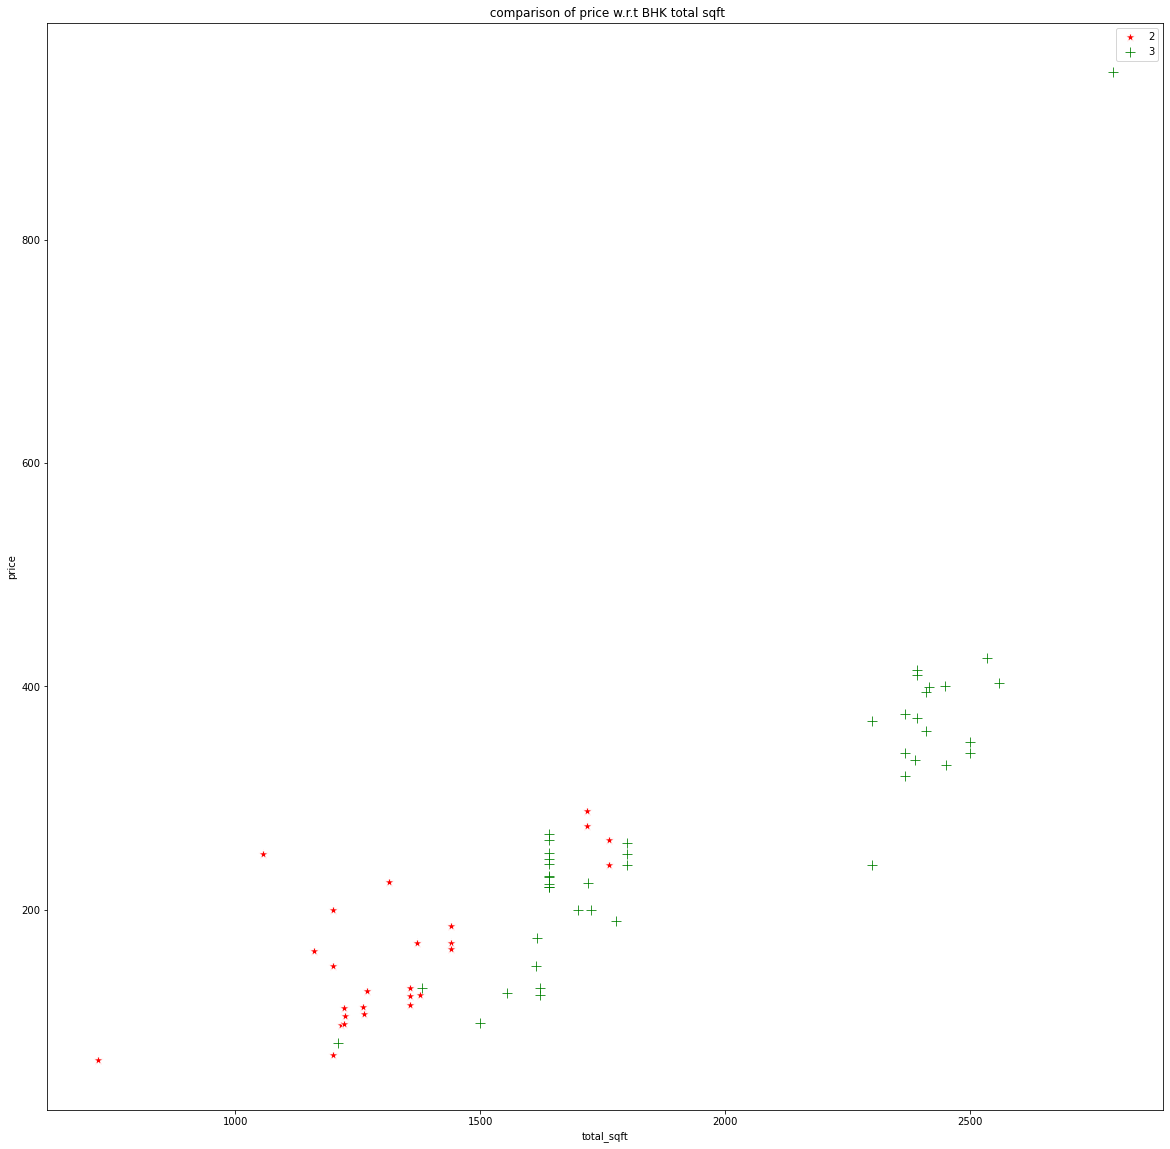

In [40]:
scatter_plot(df,"Rajaji Nagar",2,3)


In [41]:
#outlier removal using std and mean

def outlier_removal(data):
    data_out=pd.DataFrame()
    for key,grp in data.groupby('location'):
        m=np.mean(grp['price_per_sqft'])
        st=np.std(grp['price_per_sqft'])
        reduced_data=grp[(grp['price_per_sqft']>(m-st)) & (grp['price_per_sqft']<(m+st))]
        data_out=pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out

df_out=outlier_removal(df)
df_out.shape

(10243, 7)

In [42]:
#Removing outliers in size columns whose price_per_sqft is less than their lower size:
def bkh_outliers(df_out):
    exclude_indices=np.array([])
    for location, location_df in df_out.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('size'):
            bhk_stats[bhk]={
                'mean':(bhk_df['price_per_sqft']).mean(),
                'std':(bhk_df['price_per_sqft']).std(),
                'count':(bhk_df['price_per_sqft'].shape[0])
                }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df_out.drop(exclude_indices,axis='index')
df_=bkh_outliers(df_out)
df_.shape

(7332, 7)

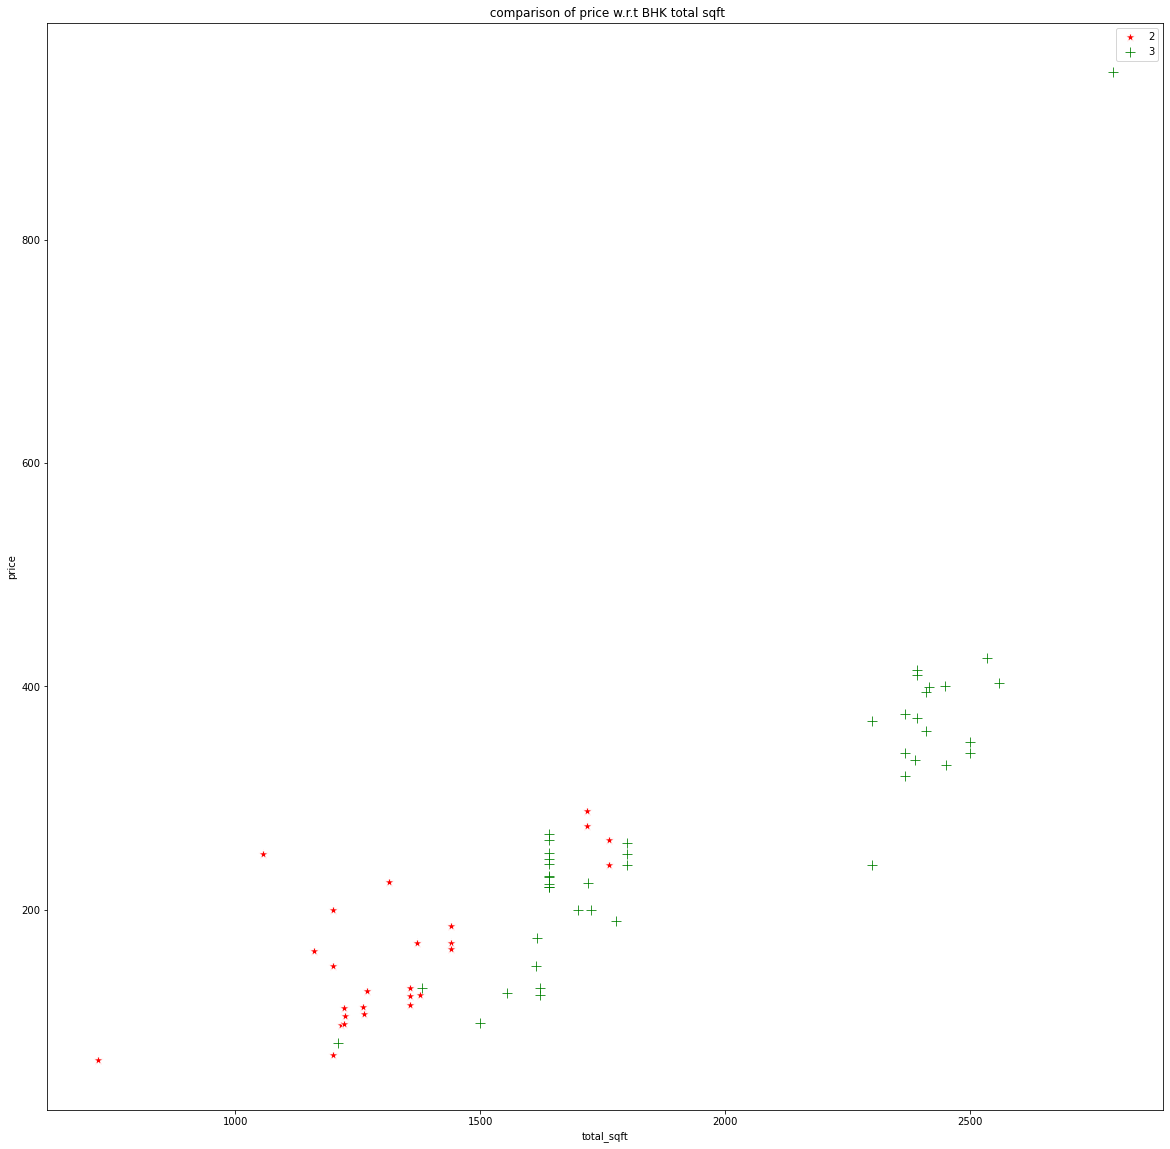

In [43]:
scatter_plot(df,"Rajaji Nagar",2,3)

In [44]:
df_.drop(columns=['price_per_sqft'],axis=1,inplace=True)

<AxesSubplot:>

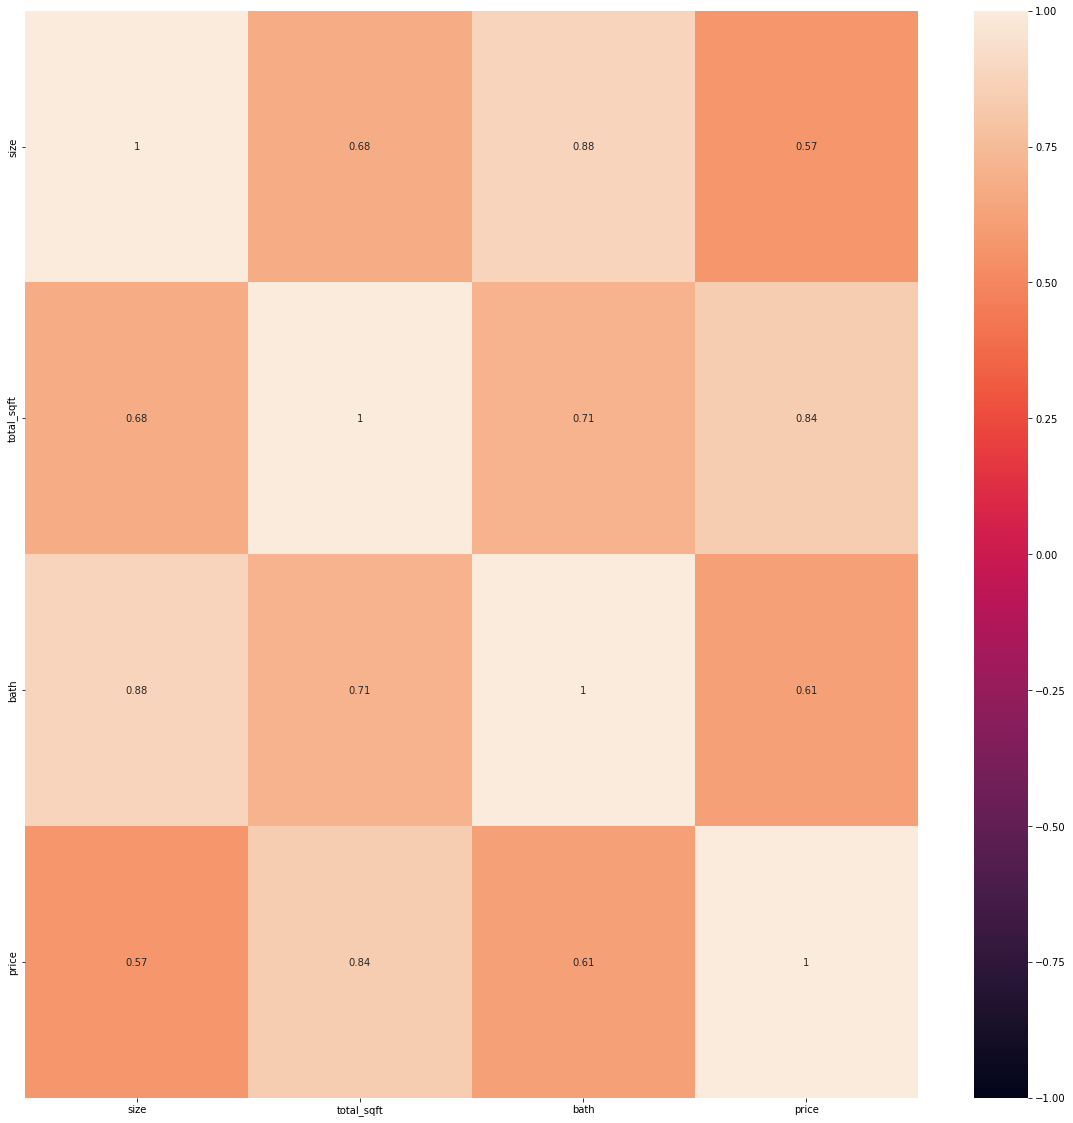

In [45]:
#Heat map to find corelation:

plt.figure(figsize=(20,20))
sns.heatmap(df_.corr(),vmin=-1,vmax=+1,annot=True)

In [46]:
#All features are correalted with target variable

In [47]:
# Applying one hot encoding for categorical variables:

area_type=pd.get_dummies(df_['area_type'],drop_first=False)
location_dummy=pd.get_dummies(df_['location'],drop_first=False)

In [48]:
area_type


,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
...,...,...,...,...
10232,0,0,0,1
10233,0,0,0,1
10235,1,0,0,0
10240,0,0,0,1


In [49]:
location_dummy

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
df_=pd.concat([df_,location_dummy,area_type],axis=1)

In [51]:
df_.drop(columns=['area_type','location'],inplace=True)

In [52]:
df_.head(2)

,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
1,2,1250.0,2,40.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1200.0,2,83.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
X=df_.copy()
X.drop(columns=['price'],axis=1,inplace=True)

In [54]:
Y=df_['price']

In [55]:
#Model building:


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [56]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [57]:
Xtrain.shape

(5865, 248)

In [58]:
Ytrain.shape

(5865,)

In [59]:
Xtest.shape

(1467, 248)

In [60]:
Ytest.shape

(1467,)

In [61]:
cv=[]
train_MAE=[]
train_RMSE=[]
train_R2_score=[]


test_MAE=[]
test_RMSE=[]
test_R2_score=[]


def model_building(model):
    
    model.fit(Xtrain,Ytrain)
    
    Y_training_pred=model.predict(Xtrain)
    train_rmse=np.sqrt(mean_squared_error(Ytrain,Y_training_pred))
    train_RMSE.append(train_rmse)
    train_mae=mean_absolute_error(Ytrain,Y_training_pred)
    train_MAE.append(train_mae)
    r2=r2_score(Ytrain,Y_training_pred)
    train_R2_score.append(r2)
    
    
    Y_test_pred=model.predict(Xtest)
    rmse=np.sqrt(mean_squared_error(Ytest,Y_test_pred))
    test_RMSE.append(rmse)
    mae=mean_absolute_error(Ytest,Y_test_pred)
    test_MAE.append(mae)
    test_r2=r2_score(Ytest,Y_test_pred)
    test_R2_score.append(test_r2)
    
    cv_score=cross_val_score(model,Xtrain,Ytrain,cv=5)
    cv_score_mean=cv_score.mean()
    cv.append(cv_score_mean)    

In [62]:
lr=LinearRegression()

model_building(lr)

In [63]:
alpha=np.logspace(-3,3,10)

ls=Lasso(alpha)

ls_rs=RandomizedSearchCV(estimator=ls,param_distributions=dict(alpha=alpha))

model_building(ls_rs)


In [64]:
rg=Ridge()

rg_rs=RandomizedSearchCV(estimator=rg,param_distributions=dict(alpha=alpha))

model_building(rg_rs)

In [65]:
rfr=RandomForestRegressor()

n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

rzc=RandomizedSearchCV(estimator=rfr,param_distributions=param_distributions)

model_building(rzc)

C:\Users\a0g0btd\Anaconda3\envs\bglrhousepred\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\a0g0btd\Anaconda3\envs\bglrhousepred\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\a0g0btd\Anaconda3\envs\bglrhousepred\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\a0g0btd\Anaconda3\envs\bglrhousepred\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use

In [66]:
gbr=GradientBoostingRegressor()

learning_rate=[0.0001,0.001,0.1]

n_estimators=list(range(100,200,500))

min_samples_split=list(range(3,6,9))

max_depth=list(range(5,10,15))

min_samples_leaf=[1,3,5,7]

max_features=['auto','sqrt']

param_distributions={"learning_rate":learning_rate,
                    "n_estimators":n_estimators,
                    "min_samples_split":min_samples_split,
                    "max_depth":max_depth,
                    "min_samples_leaf":min_samples_leaf,
                    "max_features":max_features}

gb_rc=RandomizedSearchCV(estimator=gbr,param_distributions=param_distributions)

model_building(gb_rc)

In [67]:
results=pd.DataFrame([cv,train_MAE,train_RMSE,train_R2_score,test_MAE,test_RMSE,test_R2_score],columns=['Linear_Regression','Lasso','Ridge','RandomForestRegressor','GradientBoosting'],index=['cv','train_MAE','train_RMSE','train_R2_score','test_MAE','test_RMSE','test_R2_score'])

In [68]:
results

,Linear_Regression,Lasso,Ridge,RandomForestRegressor,GradientBoosting
cv,-1.981626e+15,0.846537,0.847074,0.760355,0.785163
train_MAE,1.740278e+01,17.418011,17.368212,21.236727,18.482464
train_RMSE,3.606627e+01,36.104463,36.109286,38.387961,28.580091
train_R2_score,8.574086e-01,0.857106,0.857068,0.838460,0.910460
test_MAE,1.813223e+01,18.068355,17.969457,22.022930,19.489864
test_RMSE,3.182378e+01,31.729762,31.532169,38.006138,30.857833
test_R2_score,8.377238e-01,0.838681,0.840684,0.768549,0.847425


In [69]:
import pickle

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(gb_rc,f)

In [70]:
var=X.iloc[1,:]

In [71]:
var

size                       2.0
total_sqft              1200.0
bath                       2.0
 Devarachikkanahalli       1.0
1st Block Jayanagar        0.0
                         ...  
Yeshwanthpur               0.0
Built-up  Area             0.0
Carpet  Area               0.0
Plot  Area                 1.0
Super built-up  Area       0.0
Name: 2, Length: 248, dtype: float64

In [72]:
location_list=["1st block jayanagar", "1st phase jp nagar", "2nd phase judicial layout", "2nd stage nagarbhavi", "5th block hbr layout", "5th phase jp nagar", "6th phase jp nagar", "7th phase jp nagar", "8th phase jp nagar", "9th phase jp nagar", "aecs layout", "abbigere", "akshaya nagar", "ambalipura", "ambedkar nagar", "amruthahalli", "anandapura", "ananth nagar", "anekal", "anjanapura", "ardendale", "arekere", "attibele", "beml layout", "btm 2nd stage", "btm layout", "babusapalaya", "badavala nagar", "balagere", "banashankari", "banashankari stage ii", "banashankari stage iii", "banashankari stage v", "banashankari stage vi", "banaswadi", "banjara layout", "bannerghatta", "bannerghatta road", "basavangudi", "basaveshwara nagar", "battarahalli", "begur", "begur road", "bellandur", "benson town", "bharathi nagar", "bhoganhalli", "billekahalli", "binny pete", "bisuvanahalli", "bommanahalli", "bommasandra", "bommasandra industrial area", "bommenahalli", "brookefield", "budigere", "cv raman nagar", "chamrajpet", "chandapura", "channasandra", "chikka tirupathi", "chikkabanavar", "chikkalasandra", "choodasandra", "cooke town", "cox town", "cunningham road", "dasanapura", "dasarahalli", "devanahalli", "devarachikkanahalli", "dodda nekkundi", "doddaballapur", "doddakallasandra", "doddathoguru", "domlur", "dommasandra", "epip zone", "electronic city", "electronic city phase ii", "electronics city phase 1", "frazer town", "gm palaya", "garudachar palya", "giri nagar", "gollarapalya hosahalli", "gottigere", "green glen layout", "gubbalala", "gunjur", "hal 2nd stage", "hbr layout", "hrbr layout", "hsr layout", "haralur road", "harlur", "hebbal", "hebbal kempapura", "hegde nagar", "hennur", "hennur road", "hoodi", "horamavu agara", "horamavu banaswadi", "hormavu", "hosa road", "hosakerehalli", "hoskote", "hosur road", "hulimavu", "isro layout", "itpl", "iblur village", "indira nagar", "jp nagar", "jakkur", "jalahalli", "jalahalli east", "jigani", "judicial layout", "kr puram", "kadubeesanahalli", "kadugodi", "kaggadasapura", "kaggalipura", "kaikondrahalli", "kalena agrahara", "kalyan nagar", "kambipura", "kammanahalli", "kammasandra", "kanakapura", "kanakpura road", "kannamangala", "karuna nagar", "kasavanhalli", "kasturi nagar", "kathriguppe", "kaval byrasandra", "kenchenahalli", "kengeri", "kengeri satellite town", "kereguddadahalli", "kodichikkanahalli", "kodigehaali", "kodigehalli", "kodihalli", "kogilu", "konanakunte", "koramangala", "kothannur", "kothanur", "kudlu", "kudlu gate", "kumaraswami layout", "kundalahalli", "lb shastri nagar", "laggere", "lakshminarayana pura", "lingadheeranahalli", "magadi road", "mahadevpura", "mahalakshmi layout", "mallasandra", "malleshpalya", "malleshwaram", "marathahalli", "margondanahalli", "marsur", "mico layout", "munnekollal", "murugeshpalya", "mysore road", "ngr layout", "nri layout", "nagarbhavi", "nagasandra", "nagavara", "nagavarapalya", "narayanapura", "neeladri nagar", "nehru nagar", "ombr layout", "old airport road", "old madras road", "padmanabhanagar", "pai layout", "panathur", "parappana agrahara", "pattandur agrahara", "poorna pragna layout", "prithvi layout", "r.t. nagar", "rachenahalli", "raja rajeshwari nagar", "rajaji nagar", "rajiv nagar", "ramagondanahalli", "ramamurthy nagar", "rayasandra", "sahakara nagar", "sanjay nagar", "sarakki nagar", "sarjapur", "sarjapur  road", "sarjapura - attibele road", "sector 2 hsr layout", "sector 7 hsr layout", "seegehalli", "shampura", "shivaji nagar", "singasandra", "somasundara palya", "sompura", "sonnenahalli", "subramanyapura", "sultan palaya", "tc palaya", "talaghattapura", "thanisandra", "thigalarapalya", "thubarahalli", "tindlu", "tumkur road", "ulsoor", "uttarahalli", "varthur", "varthur road", "vasanthapura", "vidyaranyapura", "vijayanagar", "vishveshwarya layout", "vishwapriya layout", "vittasandra", "whitefield", "yelachenahalli", "yelahanka", "yelahanka new town", "yelenahalli", "yeshwanthpur"]
len(location_list)

240

In [73]:
X.shape

(7332, 248)

In [110]:
test=[2.0,1000,2.0,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,1,0]

In [111]:
test=pd.DataFrame(test,index=X.columns).T

In [112]:
test

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,2.0,1000.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [116]:
tt=test.values

In [117]:
tt

array([[   2., 1000.,    2.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

In [118]:
res=gb_rc.predict(tt)

C:\Users\a0g0btd\Anaconda3\envs\bglrhousepred\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [119]:
res

array([176.11381714])